# Scratch
#### Angela Jiang, Alexander Lin, Jason Shen

In [55]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from datetime import timedelta
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.linear_model import LogisticRegressionCV as LogRegCV
from sklearn.linear_model import LinearRegression as LinReg
import math
import string 
from six.moves.html_parser import HTMLParser
import urllib2
import json
import time
from functools import wraps
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
stock_price = pd.read_csv('12-4-06-to-12-3-16-Quotes.csv', parse_dates = [0], keep_date_col = True, encoding = 'cp1252')

stock_price.head(n=5)

,date,close,volume,open,high,low
0,2016-12-02,109.90,26481320.0,109.170,110.090,108.85
1,2016-12-01,109.49,37034520.0,110.365,110.940,109.03
2,2016-11-30,110.52,36151450.0,111.600,112.200,110.27
3,2016-11-29,111.46,28507780.0,110.780,112.030,110.07
4,2016-11-28,111.57,27054320.0,111.430,112.465,111.39


In [49]:
train_size = .25

x_train = bag_words[:int(math.ceil(train_size*len(bag_words)))]
y_train = filtered_df['y'].values[:int(math.ceil(train_size*len(bag_words)))]

x_test = bag_words[int(math.ceil(train_size*len(bag_words))):]
y_test = filtered_df['y'].values[int(math.ceil(train_size*len(bag_words))):]

ones_test = np.count_nonzero(y_test)
zeros_test = len(y_test) - ones_test
ones_train = np.count_nonzero(y_train)
zeros_train = len(y_train) - ones_train

print 'Ones Count - Train: ', ones_train
print 'Zeros Count - Train: ', zeros_train
print 'Ones Count - Test: ', ones_test
print 'Zeros Count - Test: ', zeros_test

Ones Count - Train:  329
Zeros Count - Train:  321
Ones Count - Test:  1037
Zeros Count - Test:  910


In [50]:
regularization = 10.**np.arange(-10, 5)
logistic = LogRegCV(cv=5, 
                    penalty='l2', 
                    Cs=regularization, 
                    solver='liblinear', 
                    n_jobs=1)
logistic.fit(x_train, y_train)

LogisticRegressionCV(Cs=array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]),
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='liblinear', tol=0.0001, verbose=0)

In [51]:
logistic.score(x_test, y_test)

0.47354904982023627

In [53]:
train_sizes = np.arange(0.1, 0.9, 0.025)
scores_train = np.zeros(len(train_sizes))
scores_test = np.zeros(len(train_sizes))
scores_index = 0

for i in train_sizes:
    
    x_train = bag_words[:int(math.ceil(i*len(bag_words)))]
    y_train = filtered_df['y'].values[:int(math.ceil(i*len(bag_words)))]

    x_test = bag_words[int(math.ceil(i*len(bag_words))):]
    y_test = filtered_df['y'].values[int(math.ceil(i*len(bag_words))):]
    
    regularization = 10.**np.arange(-10, 5)
    logistic = LogRegCV(cv=5, 
                        penalty='l2', 
                        Cs=regularization, 
                        solver='liblinear', 
                        n_jobs=1)
    logistic.fit(x_train, y_train)
    
    scores_test[scores_index] = logistic.score(x_test, y_test)
    scores_train[scores_index] = logistic.score(x_train, y_train)
    scores_index += 1
    

In [ ]:
print bag_words

In [66]:
pd.DataFrame(np.array(bag_words).astype(int)).to_excel('bagofwords.xlsx')

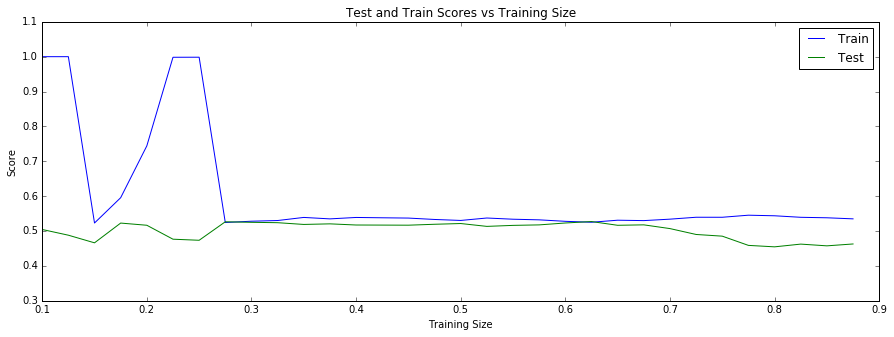

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(train_sizes, scores_train, label='Train')
ax.plot(train_sizes, scores_test, label='Test')

ax.set_xlabel('Training Size')

ax.set_ylabel('Score')
ax.set_ylim(0.3,1.1)
ax.set_title('Test and Train Scores vs Training Size')

#Turn the labels sideways so they don't overlap
plt.setp(labels, rotation=90, fontsize=10)
plt.legend()
plt.show()

In [133]:
years = range(2006, 2017)
for year in years:
    original_year_df = df[(df['publish_date'] >= str(year) + '-01-01') & (df['publish_date'] <= str(year) + '-12-31')]
    filtered_year_df = filtered_df[(filtered_df['publish_date'] >= str(year) + '-01-01') & (filtered_df['publish_date'] <= str(year) + '-12-31')]
    print 'Original ({}): {}'.format(year, original_year_df.shape[0])
    print 'Filtered ({}): {}'.format(year, filtered_year_df.shape[0])

Original (2006): 0
Filtered (2006): 0
Original (2007): 646
Filtered (2007): 94
Original (2008): 6
Filtered (2008): 0
Original (2009): 6
Filtered (2009): 0
Original (2010): 36
Filtered (2010): 0
Original (2011): 75
Filtered (2011): 2
Original (2012): 9
Filtered (2012): 3
Original (2013): 18
Filtered (2013): 0
Original (2014): 66
Filtered (2014): 0
Original (2015): 87
Filtered (2015): 2
Original (2016): 3757
Filtered (2016): 144
